1. Processar Dados para Extrair Padrões

In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
df = pd.read_csv('../crime_segunda_area.csv')

# Tratamento de Dados

In [689]:
display(df)

,latitude,longitude,data,hora,tipo_crime,bairro,rua,tipo_dia,ano,nome,cpf,idade,email,telefone,endereco,__ERR0O0__,null
0,-15.795465,-47.894569,2025-05-30,10:26,tráfico,Asa Sul,W3 Sul,final_semana,2025,Dra. Emanuella Monteiro,398.275.014-88,NaN,ana-lauraalmeida@example.net,81 4891-2961,"W3 Sul Bloco C, Ap 927",ERRO_404,NaN
1,-15.815310,-47.900396,2023-05-25,00:32,furto,Asa Sul,Novo Setor 1,dia_normal,2023,Lucas Casa Grande,964.185.037-75,39.0,cavalcantigiovanna@example.com,0300-612-0943,"Novo Setor 1 Bloco B, Ap 287",ERRO_404,NaN
2,-15.822681,-47.895564,2024-09-10,09:23,vandalismo,Asa Sul,L2 Sul,dia_normal,2024,Pedro Miguel Nunes,461.078.295-20,56.0,NaN,0500-738-8974,"L2 Sul Lote 1, Sala 109",ERRO_404,NaN
3,-15.827740,-47.916587,2023-09-09,17:47,roubo,Asa Sul,Eixo L Sul,final_semana,2023,Bryan Correia,465.132.079-16,NaN,da-conceicaobento@example.net,+55 11 6421 4067,"Eixo L Sul Edifício Alpha, Unidade 211",ERRO_404,NaN
4,-15.814601,-47.896591,2022-06-30,10:04,furto,Asa Sul,Novo Setor 1,dia_normal,2022,Vinicius Cavalcante,294.357.168-73,15.0,zcunha@example.net,(061) 8519-4834,"Novo Setor 1 Edifício Delta, Unidade 102",ERRO_404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-15.809178,-47.904259,2025-04-17,22:52,furto,Asa Sul,W3 Sul,dia_normal,2025,Eloah Ribeiro,150.679.842-01,23.0,maria-luizafreitas@example.org,21 8130-4087,"W3 Sul Edifício Omega, Unidade 127",ERRO_404,NaN
29996,-15.820620,-47.897977,2021-06-05,15:19,roubo,Asa Sul,Novo Setor 1,final_semana,2021,Leonardo Lima,261.438.570-08,32.0,maria-juliagomes@example.com,41 2968 6448,"Novo Setor 1 Edifício Bravo, Unidade 181",ERRO_404,NaN
29997,-15.825525,-47.907784,2020-01-08,06:31,feminicídio,Asa Sul,L2 Sul,dia_normal,2020,NaN,473.061.928-50,17.0,paulo54@example.org,51 1462 0572,"L2 Sul Bloco B, Ap 277",ERRO_404,NaN
29998,-15.828281,-47.916221,2025-04-02,05:54,feminicídio,Asa Sul,Eixo L Sul,dia_normal,2025,NaN,431.087.629-31,64.0,gabriela26@example.net,+55 (081) 8299-9945,"Eixo L Sul Lote 41, Sala 293",ERRO_404,NaN


### Inspeção inicial

In [690]:
print(f"Dimensões do DataFrame\n\n{df.shape}")
print("\nHEAD\n",df.head())
print("\nDESCRIBE\n",df.describe(include="all"))

Dimensões do DataFrame

(30000, 17)

HEAD
     latitude  longitude        data   hora  tipo_crime   bairro           rua  \
0 -15.795465 -47.894569  2025-05-30  10:26     tráfico  Asa Sul        W3 Sul   
1 -15.815310 -47.900396  2023-05-25  00:32       furto  Asa Sul  Novo Setor 1   
2 -15.822681 -47.895564  2024-09-10  09:23  vandalismo  Asa Sul        L2 Sul   
3 -15.827740 -47.916587  2023-09-09  17:47       roubo  Asa Sul    Eixo L Sul   
4 -15.814601 -47.896591  2022-06-30  10:04       furto  Asa Sul  Novo Setor 1   

       tipo_dia   ano                     nome             cpf  idade  \
0  final_semana  2025  Dra. Emanuella Monteiro  398.275.014-88    NaN   
1    dia_normal  2023        Lucas Casa Grande  964.185.037-75   39.0   
2    dia_normal  2024       Pedro Miguel Nunes  461.078.295-20   56.0   
3  final_semana  2023            Bryan Correia  465.132.079-16    NaN   
4    dia_normal  2022      Vinicius Cavalcante  294.357.168-73   15.0   

                            ema

### Verificando dados Nulos

In [691]:
print(df.isnull().sum())

latitude          0
longitude         0
data              0
hora              0
tipo_crime      296
bairro            0
rua               0
tipo_dia          0
ano               0
nome            896
cpf               0
idade          2482
email          5978
telefone       2126
endereco       2673
__ERR0O0__        0
null          30000
dtype: int64


### Tratando coluna de Erro e null

In [692]:
df = df.drop(columns=["__ERR0O0__", "null"])
print(df)

        latitude  longitude        data   hora   tipo_crime   bairro  \
0     -15.795465 -47.894569  2025-05-30  10:26      tráfico  Asa Sul   
1     -15.815310 -47.900396  2023-05-25  00:32        furto  Asa Sul   
2     -15.822681 -47.895564  2024-09-10  09:23   vandalismo  Asa Sul   
3     -15.827740 -47.916587  2023-09-09  17:47        roubo  Asa Sul   
4     -15.814601 -47.896591  2022-06-30  10:04        furto  Asa Sul   
...          ...        ...         ...    ...          ...      ...   
29995 -15.809178 -47.904259  2025-04-17  22:52        furto  Asa Sul   
29996 -15.820620 -47.897977  2021-06-05  15:19        roubo  Asa Sul   
29997 -15.825525 -47.907784  2020-01-08  06:31  feminicídio  Asa Sul   
29998 -15.828281 -47.916221  2025-04-02  05:54  feminicídio  Asa Sul   
29999 -15.817664 -47.907833  2025-01-17  07:18        roubo  Asa Sul   

                rua      tipo_dia   ano                     nome  \
0            W3 Sul  final_semana  2025  Dra. Emanuella Monteiro   

# Visualização de Dados

### Mapa de Correlação

## a) Crimes por Horário


In [693]:

# Contar crimes por hora
df['hora'] = pd.to_datetime(df['hora']).dt.hour
crimes_por_hora = df.groupby('hora').size().reset_index(name='contagem')
crimes_por_hora = crimes_por_hora.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes:")
print(crimes_por_hora.head(24))

C:\Users\migue\AppData\Local\Temp\ipykernel_41768\2489483636.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora']).dt.hour


Horários com mais crimes:
    hora  contagem
21    21      1705
23    23      1696
20    20      1668
22    22      1665
1      1      1649
0      0      1637
19    19      1594
2      2      1541
18    18      1496
3      3      1458
17    17      1340
4      4      1281
5      5      1186
16    16      1174
15    15      1116
6      6      1034
7      7       946
14    14       915
8      8       884
13    13       849
9      9       825
12    12       787
10    10       783
11    11       771


   hora
0    10
1     0
2     9
3    17
4    10


C:\Users\migue\AppData\Local\Temp\ipykernel_41768\2404268541.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_por_hora.index, y=crimes_por_hora.values, palette=colors)


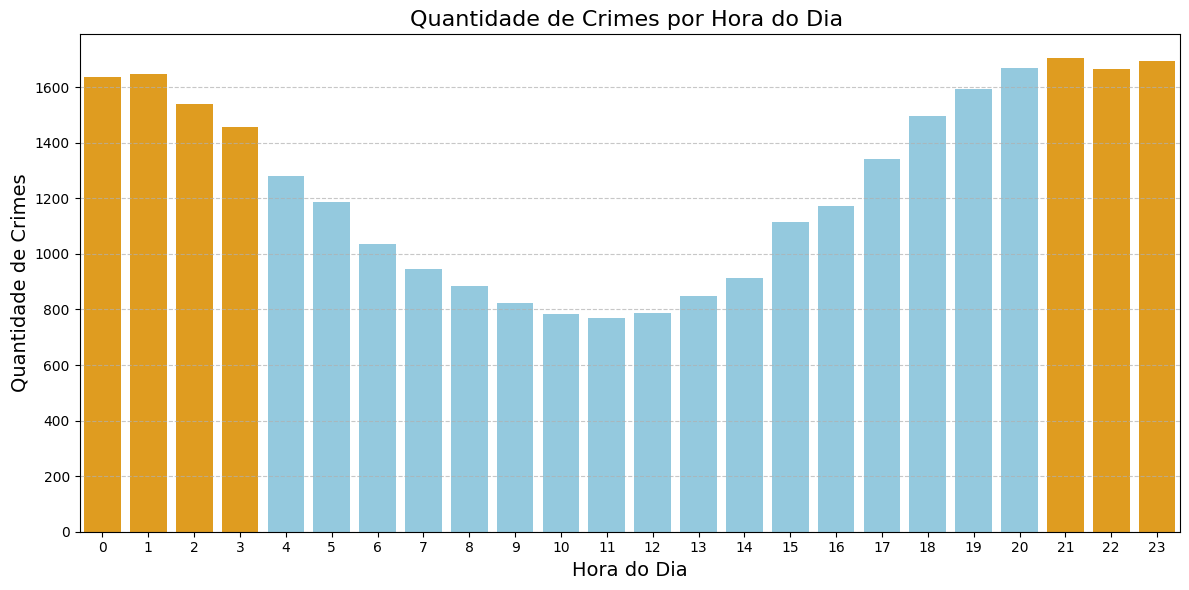

In [694]:

# Verificar as primeiras linhas
print(df[['hora']].head())

# Contar quantos crimes ocorreram em cada hora
crimes_por_hora = df['hora'].value_counts().sort_index()
# Definir cores para destacar 21h–23h e 0h–2h
colors = ['orange' if h >= 21 or h < 4 else 'skyblue' for h in crimes_por_hora.index]

# Plotar com cores personalizadas
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_por_hora.index, y=crimes_por_hora.values, palette=colors)
plt.title("Quantidade de Crimes por Hora do Dia ", fontsize=16)
plt.xlabel("Hora do Dia", fontsize=14)
plt.ylabel("Quantidade de Crimes", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('crimes_por_hora_destacado.png', dpi=300)
plt.show()

b) Crimes por Localização


In [695]:
# Contar crimes por rua
crimes_por_rua = df.groupby('rua').size().reset_index(name='contagem')
crimes_por_rua = crimes_por_rua.sort_values(by='contagem', ascending=False)
print("Ruas com mais crimes:")
print(crimes_por_rua.head(3))

Ruas com mais crimes:
            rua  contagem
2  Novo Setor 1      7559
3        W3 Sul      7499
0    Eixo L Sul      7480


    c) Crimes por Tipo


In [696]:
# Contar crimes por tipo
crimes_por_tipo = df.groupby('tipo_crime').size().reset_index(name='contagem')
crimes_por_tipo = crimes_por_tipo.sort_values(by='contagem', ascending=False)
print("Tipos de crime mais comuns:")
print(crimes_por_tipo.head(3))

Tipos de crime mais comuns:
   tipo_crime  contagem
1       furto      8714
3       roubo      6056
5  vandalismo      5622


2. Criar um Modelo de Priorização Simples


a) Calcular Risco por Região


In [697]:
# Definir pesos por tipo de crime
pesos = {
    'feminicídio': 5,
    'homicídio': 5,
    'tráfico': 4,
    'roubo': 3,
    'furto': 2,
    'vandalismo': 1
}

# Adicionar coluna de peso
df['peso'] = df['tipo_crime'].map(pesos)

# Calcular pontuação de risco por rua
risco_por_rua = df.groupby('rua')['peso'].sum().reset_index(name='risco_total')
risco_por_rua = risco_por_rua.sort_values(by='risco_total', ascending=False)
print("Ruas com maior risco:")
print(risco_por_rua.head(3))

Ruas com maior risco:
            rua  risco_total
2  Novo Setor 1      20922.0
0    Eixo L Sul      20855.0
3        W3 Sul      20774.0


b) Identificar Horários de Risco


In [698]:
# Filtrar crimes graves (ex: homicídio, tráfico)
crimes_graves = df[df['tipo_crime'].isin(['homicídio', 'tráfico'])]

# Contar crimes graves por hora
horarios_risco = crimes_graves.groupby('hora').size().reset_index(name='contagem')
horarios_risco = horarios_risco.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes graves:")
print(horarios_risco.head(3))

Horários com mais crimes graves:
    hora  contagem
20    20       484
18    18       417
19    19       413



Quantidade total de crimes: 30000
Quantidade de crimes noturnos: 13818

Principais tipos de crimes noturnos:
    tipo_crime  quantidade  porcentagem
0        furto        4121    30.124269
1        roubo        2916    21.315789
2   vandalismo        2689    19.656433
3      tráfico        1838    13.435673
4    homicídio        1360     9.941520
5  feminicídio         756     5.526316


C:\Users\migue\AppData\Local\Temp\ipykernel_41768\840625072.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')


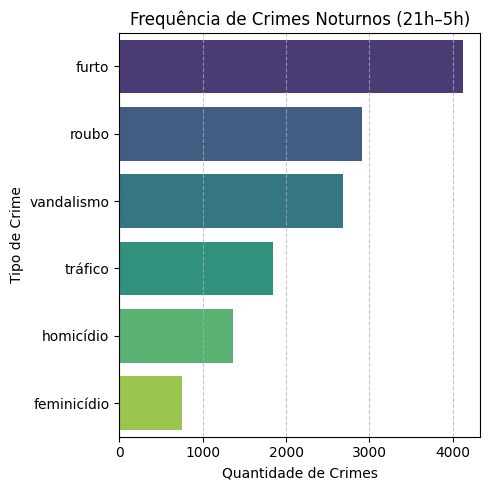

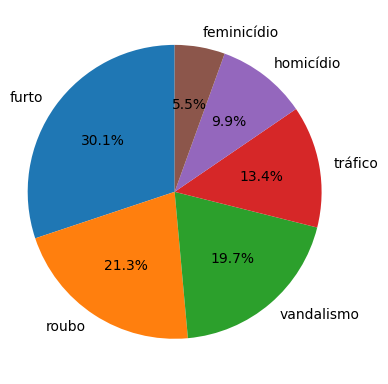

In [699]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar crimes noturnos (21h–23h e 00h–5h)
crimes_noturnos = df[(df['hora'] >= 21) | (df['hora'] <= 5)]

# Verificar se há registros noturnos
print("\nQuantidade total de crimes:", len(df))
print("Quantidade de crimes noturnos:", len(crimes_noturnos))

# Contar frequência de cada tipo de crime noturno
frequencia_crimes = crimes_noturnos['tipo_crime'].value_counts().reset_index()
frequencia_crimes.columns = ['tipo_crime', 'quantidade']

# Calcular porcentagem
total_crimes = frequencia_crimes['quantidade'].sum()
frequencia_crimes['porcentagem'] = (frequencia_crimes['quantidade'] / total_crimes) * 100

# Exibir resultados
print("\nPrincipais tipos de crimes noturnos:")
print(frequencia_crimes)

# Gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')
plt.title('Frequência de Crimes Noturnos (21h–5h)')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Tipo de Crime')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('crimes_noturnos_barras.png', dpi=300)
plt.show()

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(frequencia_crimes['quantidade'], labels=frequencia_crimes['tipo_crime'], autopct='%1.1f%%', startangle=90)
# plt.title('Distribuição de Crimes Noturnos (21h–5h)')
plt.axis('equal')  # Para manter o círculo redondo
plt.tight_layout()
plt.show()

3. Visualizar os Resultados


In [700]:
import folium

# Criar mapa centrado na Asa Sul
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=15)

# Adicionar marcadores dos crimes
for _, row in risco_por_rua.head(5).iterrows():
    # Filtrar coordenadas médias da rua
    lat = df[df['rua'] == row['rua']]['latitude'].mean()
    lon = df[df['rua'] == row['rua']]['longitude'].mean()
    folium.Marker(
        location=[lat, lon],
        popup=f"{row['rua']} (Risco: {row['risco_total']})",
        icon=folium.Icon(color='red')
    ).add_to(mapa)

mapa.save('mapa_risco.html')
print("✅ Mapa salvo como 'mapa_risco.html'")

✅ Mapa salvo como 'mapa_risco.html'


In [701]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


## Mapa de Calor por hora

In [702]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import DBSCAN

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Converter hora para numérica (se ainda não estiver)
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M', errors='coerce').dt.hour

# Loop por cada hora do dia (0–23)
for hora in range(24):
    # Filtrar dados para a hora atual
    df_hora = df[df['hora'] == hora]
    
    # Agrupar pontos próximos usando DBSCAN (epsilon=0.005 graus ≈ 500 metros)
    coords = df_hora[['latitude', 'longitude']].values
    dbscan = DBSCAN(eps=0.005, min_samples=5).fit(coords)
    labels = dbscan.labels_
    
    # Calcular centroides dos clusters
    unique_labels = set(labels)
    clusters = []
    for label in unique_labels:
        if label == -1:
            continue  # Ignorar outliers
        cluster = coords[labels == label]
        centroid = (np.mean(cluster[:, 0]), np.mean(cluster[:, 1]))
        count = len(cluster)
        clusters.append({'centroid': centroid, 'count': count})
    
    # Selecionar os 3 clusters com mais crimes
    top_clusters = sorted(clusters, key=lambda x: -x['count'])[:3]
    
    # Criar mapa base
    mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')
    
    # Cluster de marcadores (amostra de 500 registros para performance)
    marker_cluster = MarkerCluster().add_to(mapa)
    for _, row in df_hora.sample(n=100).iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['rua']} - {row['tipo_crime']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)
    
    # Heatmap com ponderação pelo 'peso' do crime (opcional)
    heat_data = [[row['latitude'], row['longitude']] for _, row in df_hora.iterrows()]
    HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)
    
    # Adicionar marcadores dos 3 clusters com maior incidência
    colors = ['darkred', 'orange', 'blue']
    for i, cluster in enumerate(top_clusters):
        lat, lon = cluster['centroid']
        count = cluster['count']
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color=colors[i % 3],
            fill=True,
            fill_color=colors[i % 3],
            popup=f"Máximo de {count} crimes nesse ponto"
        ).add_to(mapa)
    
    # Adicionar legenda da hora
    folium.map.LayerControl('bottomleft').add_to(mapa)
    folium.Marker(
        location=[-15.7942, -47.8825],
        icon=folium.DivIcon(html=f'<div style="font-weight: bold; color: red;">{hora}h</div>')
    ).add_to(mapa)
    
    # Salvar mapa da hora atual
    filename = f'mapa_calor_{hora:02d}.html'
    mapa.save(filename)
    print(f"✅ Mapa da {hora}h salvo como '{filename}'")

✅ Mapa da 0h salvo como 'mapa_calor_00.html'
✅ Mapa da 1h salvo como 'mapa_calor_01.html'
✅ Mapa da 2h salvo como 'mapa_calor_02.html'
✅ Mapa da 3h salvo como 'mapa_calor_03.html'
✅ Mapa da 4h salvo como 'mapa_calor_04.html'
✅ Mapa da 5h salvo como 'mapa_calor_05.html'
✅ Mapa da 6h salvo como 'mapa_calor_06.html'
✅ Mapa da 7h salvo como 'mapa_calor_07.html'
✅ Mapa da 8h salvo como 'mapa_calor_08.html'
✅ Mapa da 9h salvo como 'mapa_calor_09.html'
✅ Mapa da 10h salvo como 'mapa_calor_10.html'
✅ Mapa da 11h salvo como 'mapa_calor_11.html'
✅ Mapa da 12h salvo como 'mapa_calor_12.html'
✅ Mapa da 13h salvo como 'mapa_calor_13.html'
✅ Mapa da 14h salvo como 'mapa_calor_14.html'
✅ Mapa da 15h salvo como 'mapa_calor_15.html'
✅ Mapa da 16h salvo como 'mapa_calor_16.html'
✅ Mapa da 17h salvo como 'mapa_calor_17.html'
✅ Mapa da 18h salvo como 'mapa_calor_18.html'
✅ Mapa da 19h salvo como 'mapa_calor_19.html'
✅ Mapa da 20h salvo como 'mapa_calor_20.html'
✅ Mapa da 21h salvo como 'mapa_calor_21.html

Nova area


In [703]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


5. Exibir Rotas no Waze ou Google Maps


In [704]:
# Exemplo de URL para abrir no Waze
lat_destino = -15.7932
lon_destino = -47.8815
url_waze = f"https://waze.com/ul?ll={lat_destino}%2C{lon_destino}&navigate=yes"
print("🔗 Rota no Waze:", url_waze)

🔗 Rota no Waze: https://waze.com/ul?ll=-15.7932%2C-47.8815&navigate=yes
